# Эмбеддинги

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Загрузка данных

In [3]:
data = pd.read_csv('lenta-ru-train.csv').iloc[:20000]
data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
print('Размерность датасета ', data_train.shape)
data_train.head()

Размерность датасета  (16000, 4)


,title,text,topic,topic_label
5894,"Фурсенко пригрозил ""Амкару"" и ""Сатурну"" отправ...",Президент Российского футбольного союза (РФС) ...,Спорт,1
3728,Палаточный городок в Иране станет достопримеча...,Власти Ирана намерены отстроить заново палаточ...,Культура,3
8958,Voyager 2 достиг границы Солнечной системы,"Станция Voyager 2, возможно, приблизилась к гр...",Наука и техника,2
7671,"""Гарри Поттер и принц-полукровка"" установил но...","Фильм ""Гарри Поттер и принц-полукровка"" устано...",Культура,3
5999,Медведев вспомнил о расстрелах в связи со срыв...,Президент России Дмитрий Медведев поручил мини...,Наука и техника,2


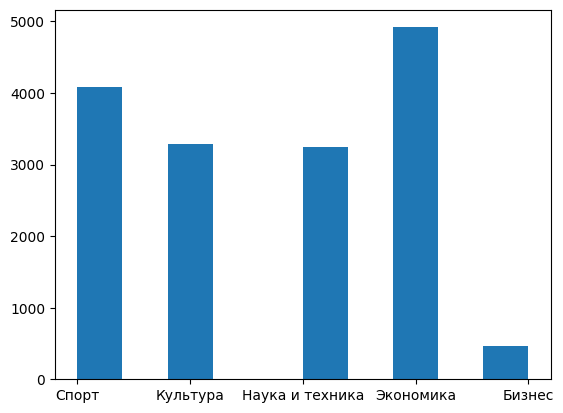

In [4]:
plt.hist(data_train['topic'])
plt.show()

# Подготовка данных



In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('russian'))

def preprocess(text):
    text = text.lower() # приводим к нижнему регистру
    text = ''.join([word for word in text if word not in string.punctuation]) # убираем пунктуацию
    tokens = word_tokenize(text) # токенизируем
    tokens = [word for word in tokens if word not in stop_words] # убираем стоп-слова
    return ' '.join(tokens)

In [7]:
%%time

X_train_clean = data_train['text'].apply(preprocess)
X_val_clean = data_val['text'].apply(preprocess)

CPU times: user 20.6 s, sys: 63.7 ms, total: 20.6 s
Wall time: 21.9 s


In [8]:
y_train = data_train['topic_label'].values
y_val = data_val['topic_label'].values

# Word2Vec

In [9]:
from gensim.models import word2vec

In [10]:
sentences_train = [text.split() for text in X_train_clean.values]
sentences_val = [text.split() for text in X_val_clean.values]

In [11]:
%%time
vector_size = 64
w2v_model = word2vec.Word2Vec(sentences=sentences_train, workers=4, vector_size=vector_size, min_count=5, window=5)

CPU times: user 26 s, sys: 152 ms, total: 26.1 s
Wall time: 17.3 s


In [12]:
w2v_model.wv.get_vector("огонь")

array([ 0.27285096, -0.48636365,  0.47993153,  0.44365647,  0.02350288,
       -0.4905399 ,  0.36233672,  0.08255194, -0.4060853 , -0.00517259,
        0.34901258, -0.16568114, -0.21516481, -0.15468337, -0.19501829,
        0.30008548, -0.57224137,  0.06106481, -0.18214318,  0.44761586,
        0.54236984,  0.47131568,  0.3551052 , -0.72295827,  0.13157773,
        0.36644205, -0.36517847,  0.1922729 , -0.20326716, -0.17662212,
       -0.07472173,  0.1412243 , -0.26482388, -0.3345945 , -0.22297703,
       -0.06113689, -0.03502135, -0.12919329,  0.15532033,  0.12191726,
        0.08644409,  0.13736604, -0.10586209,  0.04081808,  0.3853938 ,
       -0.07587644, -0.16880733, -0.31025714, -0.04557121,  0.46127254,
        0.02740752,  0.11280963,  0.3064688 ,  0.23841323,  0.23143218,
        0.04537286,  0.2620282 , -0.3388331 , -0.08083945,  0.17792049,
       -0.0922843 , -0.23969257, -0.16235726,  0.0571496 ], dtype=float32)

In [13]:
w2v_model.wv.most_similar(positive=["кризис"])

[('экономический', 0.9373784065246582),
 ('темпов', 0.9180723428726196),
 ('безработицы', 0.9155075550079346),
 ('спада', 0.9151726961135864),
 ('экономике', 0.9055577516555786),
 ('кризисом', 0.9014993906021118),
 ('темпы', 0.9012663960456848),
 ('глобальный', 0.8998755812644958),
 ('роста', 0.898602306842804),
 ('среднесрочной', 0.8947774767875671)]

In [14]:
w2v_model.wv.most_similar(positive=["технологии"])

[('карты', 0.9362870454788208),
 ('системой', 0.9155029654502869),
 ('материалов', 0.9154472947120667),
 ('программного', 0.9118882417678833),
 ('различные', 0.9104886054992676),
 ('использованием', 0.9062259793281555),
 ('программное', 0.9013540148735046),
 ('интернета', 0.9010870456695557),
 ('используется', 0.8929727077484131),
 ('использование', 0.8913493752479553)]

In [15]:
w2v_model.wv.similarity('спорт', 'кино')

0.2793423

In [16]:
w2v_model.wv.similarity('теннис', 'футбол')

0.8106081

In [17]:
w2v_model.wv.doesnt_match(['инфляция', 'ввп', 'гол'])

'гол'

In [18]:
def vectorize(sentences):
    X = []
    for sentence in sentences:
        sentence_vector = []
        for word in sentence:
            try:
                vector = w2v_model.wv.get_vector(word)
                sentence_vector.append(vector)
            except KeyError:
                # если слово не встретилось при обучениии модели word2vec
                pass
        if len(sentence_vector) > 0:
            sentence_vector = np.array(sentence_vector).mean(axis=0)
        else:
            # вернем нулевой вектор для новости, у которой ни одно слово не встречалось в обучении
            sentence_vector = np.zeros(vector_size)
        X.append(sentence_vector)
    return np.array(X)

In [19]:
W2V_train = vectorize(sentences_train)
W2V_val = vectorize(sentences_val)

In [20]:
W2V_train[:5, :10]

array([[ 0.3763923 , -0.30047661,  0.67264146,  0.83275443, -0.12848288,
        -0.22173066,  0.5307017 , -0.36552218, -0.50267041, -0.16881227],
       [ 0.41702074, -0.39153588,  0.20994388,  0.21273087, -0.01609752,
        -0.58108467,  0.21378368, -0.38133457, -0.37899259,  0.32746899],
       [ 0.64065707, -0.60265958,  0.67471135, -0.06617871, -0.0354089 ,
        -0.96893162,  0.33055711, -0.57391536, -0.92515767,  0.34145316],
       [ 0.81921917, -0.58428985,  0.47661024, -0.6400755 , -0.22614074,
        -1.05766559,  0.40915999, -0.30117878, -0.66954052,  0.81051815],
       [ 0.53147262, -0.41263759,  0.49724525,  0.2273028 , -0.14629856,
        -0.79232001,  0.09292289, -0.7204982 , -0.51283854, -0.23600248]])

# Визуализация эмбеддингов

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(W2V_train)

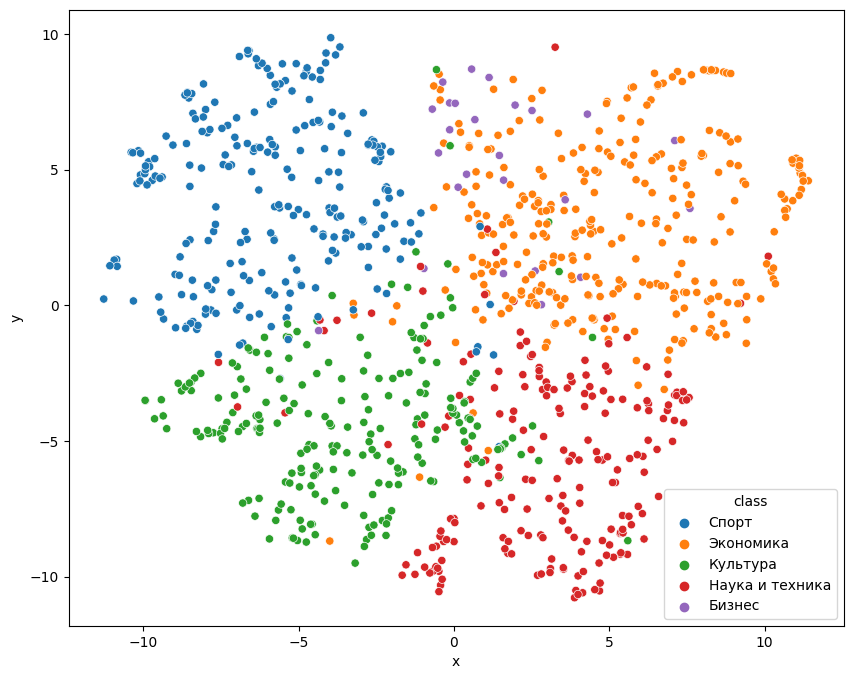

In [22]:
data_viz = {
    'x': tsne_results[:,0],
    'y': tsne_results[:,1],
    'class': data_train['topic'].values,
}

df_viz = pd.DataFrame(data_viz)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_viz.sample(1000), x='x', y='y', hue='class')
plt.show()

# Обучим модель

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(W2V_train, y_train)

y_pred = model.predict(W2V_val)
score = accuracy_score(y_val, y_pred)

print('Доля правильных ответов Word2Vec + лог. регрессии ', round(score, 3))

Доля правильных ответов Word2Vec + лог. регрессии  0.91
